In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
np.set_printoptions(precision=2) 
np.set_printoptions(linewidth=160)
import seaborn as sns
import json as json

import matplotlib.pyplot as plt
import matplotlib as mpl



In [9]:
%config InlineBackend.print_figure_kwargs={'facecolor' : "w", 'bbox_inches': 'tight'}

# Use latex
import matplotlib as mpl
import shutil

# find the path to pdflatex executable
pdflatex_path = shutil.which("pdflatex")

mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 16,  # default for all
    "axes.titlesize": 20,  # fontsize of the axes title
    "axes.labelsize": 18,  # fontsize of the x and y labels
    "xtick.labelsize": 16,  # fontsize of the tick labels
    "ytick.labelsize": 16,  # fontsize of the tick labels
})



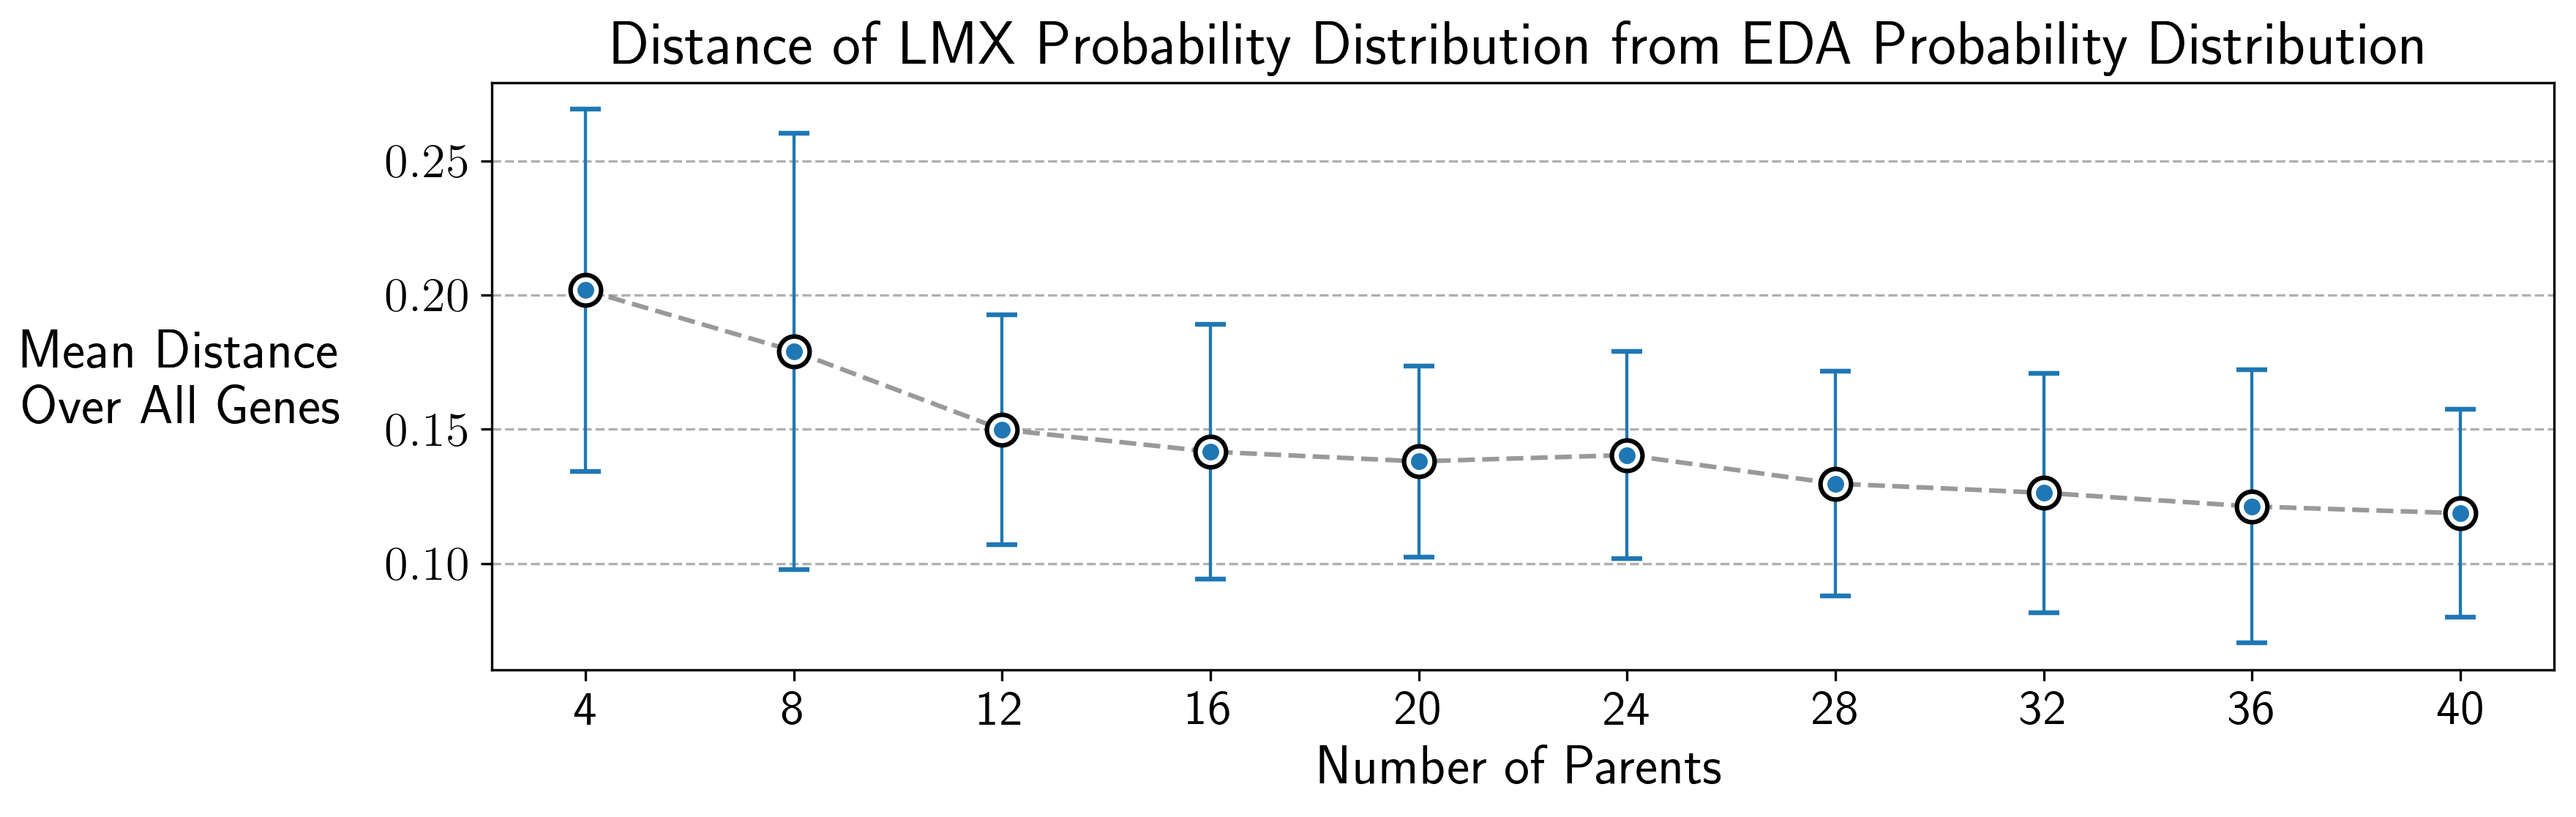

In [43]:
# Load results from file
with open('results.json', 'r') as f:
    results = json.load(f)

n_parents = list(results.keys())
means = [np.mean([results[n][i][1] for i in range(len(results[n]))]) for n in n_parents]
stds = [np.std([results[n][i][1] for i in range(len(results[n]))]) for n in n_parents]

fig, ax = plt.subplots(figsize=(12,4), dpi=300)

# Add a dashed line connecting the points in gray
ax.plot(n_parents, means, color='gray', linestyle='dashed', alpha=0.8)

# Add markers with black edge color and increased size
line = ax.errorbar(n_parents, means, yerr=stds, fmt='o', elinewidth=1, capsize=5,
            markersize=10, markeredgewidth=1.5, markeredgecolor='black')

# Second errorbar with color matched to the first
ax.errorbar(n_parents, means, yerr=stds, fmt='o', elinewidth=1, capsize=5,
            markersize=7, markeredgewidth=1.5, markeredgecolor='white', color=line[0].get_color())


ax.set_title('Distance of LMX Probability Distribution from EDA Probability Distribution')
ax.set_xlabel('Number of Parents')
ax.set_ylabel('Mean Distance\nOver All Genes', rotation=0)
ax.yaxis.set_label_coords(-0.15, 0.4)  # Adjust label position here
ax.grid(axis='y', linestyle='--')

fig.tight_layout()
plt.show()
fig.savefig("eda_diff.pgf")
